In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
import cv2
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D ,AveragePooling2D, Flatten, Dropout
from keras.layers.core import Dense
from keras.optimizers import RMSprop,Adam,SGD
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
os.getcwd()

'/content'

In [0]:
handle_train=zipfile.ZipFile(r'/content/Train.zip')
handle_train.extractall('/content/train')
handle_train.close()
handle_test=zipfile.ZipFile(r'/content/Test.zip')
handle_test.extractall('/content/test')
handle_test.close()

In [0]:
train_images=os.listdir('/content/train/Train/')
test_images = os.listdir('/content/test/Test')

filepath_train = '/content/train/Train/'
filepath_test = '/content/test/Test/' 

In [5]:
df_train = pd.read_csv('/content/train.csv')
df_train.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [6]:
sample_submn = pd.read_csv('/content/sample_submission_sDO3m7O.csv')
sample_submn.head()

,Class,ID
0,MIDDLE,25321.jpg
1,MIDDLE,989.jpg
2,MIDDLE,19277.jpg
3,MIDDLE,13093.jpg
4,MIDDLE,5367.jpg


In [0]:

images=[]
labels=[]

for index, row in df_train.iterrows():
  image=cv2.imread(filepath_train+row['ID'])
  image=cv2.resize(image , (64,64))
  images.append(image)
  labels.append(row['Class'])
  #print(row['ID'])


In [0]:
images_test=[]
outputs=[]

for index,row in sample_submn.iterrows():
  image=cv2.imread(filepath_test+row['ID'])
  image=cv2.resize(image , (64,64))
  images_test.append(image) 
  outputs.append(image)

In [9]:
images_test[0]

array([[[ 16,  20,  25],
        [ 16,  20,  25],
        [ 17,  21,  26],
        ...,
        [ 23,  27,  28],
        [ 23,  26,  27],
        [ 24,  26,  26]],

       [[ 19,  23,  28],
        [ 19,  23,  27],
        [ 18,  22,  26],
        ...,
        [ 22,  26,  27],
        [ 24,  27,  27],
        [ 26,  28,  28]],

       [[ 21,  26,  30],
        [ 20,  25,  27],
        [ 18,  23,  24],
        ...,
        [ 20,  24,  25],
        [ 24,  27,  28],
        [ 27,  29,  29]],

       ...,

       [[108, 115, 148],
        [109, 116, 149],
        [110, 117, 150],
        ...,
        [  6,  13,  14],
        [  9,  15,  14],
        [ 10,  16,  15]],

       [[102, 109, 142],
        [103, 110, 143],
        [104, 111, 144],
        ...,
        [  7,  12,  13],
        [  8,  13,  13],
        [  9,  14,  14]],

       [[ 97, 104, 137],
        [ 98, 105, 138],
        [100, 107, 140],
        ...,
        [  7,  13,  12],
        [  7,  13,  12],
        [  7,  13,  12]]

In [10]:
images[0]

array([[[ 48,  47,  51],
        [ 47,  46,  50],
        [ 44,  43,  45],
        ...,
        [  3,  11,   4],
        [  6,  14,   7],
        [  5,  13,   6]],

       [[ 49,  48,  51],
        [ 47,  46,  49],
        [ 43,  42,  44],
        ...,
        [  8,  16,  10],
        [ 11,  18,  12],
        [ 10,  18,  12]],

       [[ 56,  55,  57],
        [ 52,  52,  54],
        [ 49,  48,  50],
        ...,
        [ 17,  24,  18],
        [ 18,  25,  20],
        [ 17,  24,  19]],

       ...,

       [[140, 152, 124],
        [131, 142, 117],
        [105, 115,  92],
        ...,
        [122, 115, 100],
        [142, 135, 120],
        [157, 150, 135]],

       [[136, 148, 120],
        [128, 139, 113],
        [102, 112,  90],
        ...,
        [126, 118, 103],
        [145, 138, 124],
        [160, 153, 138]],

       [[137, 149, 121],
        [129, 139, 114],
        [102, 111,  89],
        ...,
        [123, 117, 101],
        [144, 137, 122],
        [158, 151, 136]]

In [11]:
print(type(images))
print(type(images_test))

<class 'list'>
<class 'list'>


In [12]:
outputs[0]

array([[[ 16,  20,  25],
        [ 16,  20,  25],
        [ 17,  21,  26],
        ...,
        [ 23,  27,  28],
        [ 23,  26,  27],
        [ 24,  26,  26]],

       [[ 19,  23,  28],
        [ 19,  23,  27],
        [ 18,  22,  26],
        ...,
        [ 22,  26,  27],
        [ 24,  27,  27],
        [ 26,  28,  28]],

       [[ 21,  26,  30],
        [ 20,  25,  27],
        [ 18,  23,  24],
        ...,
        [ 20,  24,  25],
        [ 24,  27,  28],
        [ 27,  29,  29]],

       ...,

       [[108, 115, 148],
        [109, 116, 149],
        [110, 117, 150],
        ...,
        [  6,  13,  14],
        [  9,  15,  14],
        [ 10,  16,  15]],

       [[102, 109, 142],
        [103, 110, 143],
        [104, 111, 144],
        ...,
        [  7,  12,  13],
        [  8,  13,  13],
        [  9,  14,  14]],

       [[ 97, 104, 137],
        [ 98, 105, 138],
        [100, 107, 140],
        ...,
        [  7,  13,  12],
        [  7,  13,  12],
        [  7,  13,  12]]

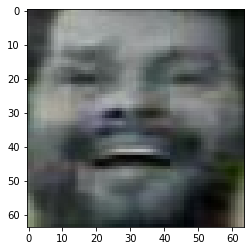

In [13]:
plt.imshow(images[0])

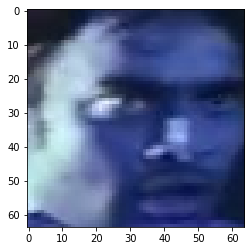

In [14]:
plt.imshow(images[1])

In [15]:
df_train.tail()

,ID,Class
19901,2482.jpg,MIDDLE
19902,20085.jpg,YOUNG
19903,19663.jpg,MIDDLE
19904,10132.jpg,MIDDLE
19905,9896.jpg,MIDDLE


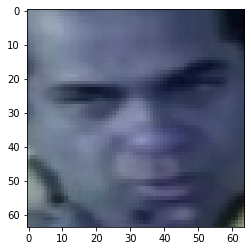

In [16]:
plt.imshow(images[-1])

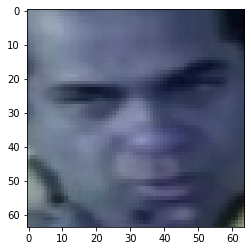

In [17]:
plt.imshow(images[19905])

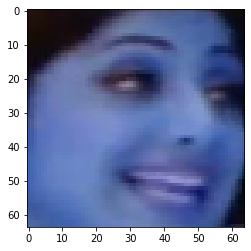

In [18]:
plt.imshow(images[19904])

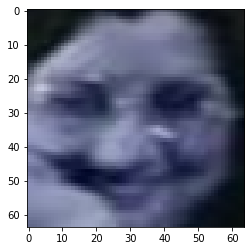

In [19]:
plt.imshow(images_test[0])

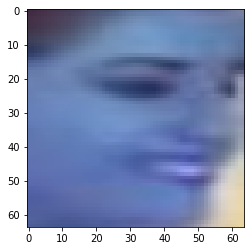

In [20]:
plt.imshow(images_test[-1])

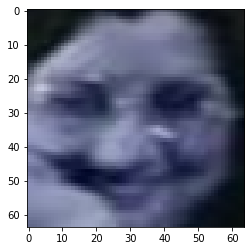

In [21]:
plt.imshow(outputs[0])

In [0]:
images = np.array(images, dtype="float") / 255.0
images_test = np.array(images_test, dtype="float") / 255.0
labels = np.array(labels)

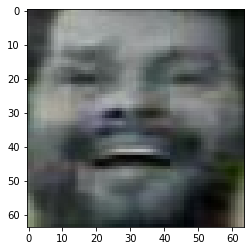

In [23]:
plt.imshow(images[0])

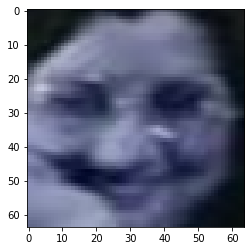

In [24]:
plt.imshow(images_test[0])

In [25]:
images[0]

array([[[0.18823529, 0.18431373, 0.2       ],
        [0.18431373, 0.18039216, 0.19607843],
        [0.17254902, 0.16862745, 0.17647059],
        ...,
        [0.01176471, 0.04313725, 0.01568627],
        [0.02352941, 0.05490196, 0.02745098],
        [0.01960784, 0.05098039, 0.02352941]],

       [[0.19215686, 0.18823529, 0.2       ],
        [0.18431373, 0.18039216, 0.19215686],
        [0.16862745, 0.16470588, 0.17254902],
        ...,
        [0.03137255, 0.0627451 , 0.03921569],
        [0.04313725, 0.07058824, 0.04705882],
        [0.03921569, 0.07058824, 0.04705882]],

       [[0.21960784, 0.21568627, 0.22352941],
        [0.20392157, 0.20392157, 0.21176471],
        [0.19215686, 0.18823529, 0.19607843],
        ...,
        [0.06666667, 0.09411765, 0.07058824],
        [0.07058824, 0.09803922, 0.07843137],
        [0.06666667, 0.09411765, 0.0745098 ]],

       ...,

       [[0.54901961, 0.59607843, 0.48627451],
        [0.51372549, 0.55686275, 0.45882353],
        [0.41176471, 0

In [26]:
images_test[0]

array([[[0.0627451 , 0.07843137, 0.09803922],
        [0.0627451 , 0.07843137, 0.09803922],
        [0.06666667, 0.08235294, 0.10196078],
        ...,
        [0.09019608, 0.10588235, 0.10980392],
        [0.09019608, 0.10196078, 0.10588235],
        [0.09411765, 0.10196078, 0.10196078]],

       [[0.0745098 , 0.09019608, 0.10980392],
        [0.0745098 , 0.09019608, 0.10588235],
        [0.07058824, 0.08627451, 0.10196078],
        ...,
        [0.08627451, 0.10196078, 0.10588235],
        [0.09411765, 0.10588235, 0.10588235],
        [0.10196078, 0.10980392, 0.10980392]],

       [[0.08235294, 0.10196078, 0.11764706],
        [0.07843137, 0.09803922, 0.10588235],
        [0.07058824, 0.09019608, 0.09411765],
        ...,
        [0.07843137, 0.09411765, 0.09803922],
        [0.09411765, 0.10588235, 0.10980392],
        [0.10588235, 0.11372549, 0.11372549]],

       ...,

       [[0.42352941, 0.45098039, 0.58039216],
        [0.42745098, 0.45490196, 0.58431373],
        [0.43137255, 0

In [0]:
(trainX, testX, trainY, testY) = train_test_split(images,labels, test_size=0.30, random_state=42)

In [28]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)

<class 'numpy.ndarray'>
(13934, 64, 64, 3)
<class 'numpy.ndarray'>
(13934,)
<class 'numpy.ndarray'>
(5972, 64, 64, 3)
<class 'numpy.ndarray'>
(5972,)


In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [30]:
lb.classes_

array(['MIDDLE', 'OLD', 'YOUNG'], dtype='<U6')

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = "same", activation ='relu', input_shape = (64,64,3)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(3,activation="softmax"))


In [0]:
INIT_LR = 0.01 
EPOCHS = 100
BS = 32

opt=SGD(lr=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt,	metrics=["accuracy"])

In [0]:
aug = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.1,horizontal_flip=True, fill_mode="nearest")

In [34]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS)

Epoch 1/100
435/435 [==============================] - 33s 75ms/step - loss: 1.1785 - accuracy: 0.5141 - val_loss: 0.9685 - val_accuracy: 0.5553
Epoch 2/100
435/435 [==============================] - 24s 56ms/step - loss: 0.8586 - accuracy: 0.6126 - val_loss: 0.7592 - val_accuracy: 0.6633
Epoch 3/100
435/435 [==============================] - 24s 55ms/step - loss: 0.8107 - accuracy: 0.6339 - val_loss: 0.7446 - val_accuracy: 0.6690
Epoch 4/100
435/435 [==============================] - 24s 55ms/step - loss: 0.7957 - accuracy: 0.6427 - val_loss: 0.9725 - val_accuracy: 0.5864
Epoch 5/100
435/435 [==============================] - 24s 54ms/step - loss: 0.7808 - accuracy: 0.6531 - val_loss: 0.8996 - val_accuracy: 0.5956
Epoch 6/100
435/435 [==============================] - 24s 55ms/step - loss: 0.7650 - accuracy: 0.6586 - val_loss: 0.8073 - val_accuracy: 0.6524
Epoch 7/100
435/435 [==============================] - 24s 55ms/step - loss: 0.7547 - accuracy: 0.6703 - val_loss: 0.7553 - val_ac

In [35]:
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      MIDDLE       0.83      0.91      0.87      3239
         OLD       0.80      0.69      0.74       701
       YOUNG       0.88      0.79      0.83      2032

    accuracy                           0.84      5972
   macro avg       0.84      0.80      0.81      5972
weighted avg       0.84      0.84      0.84      5972



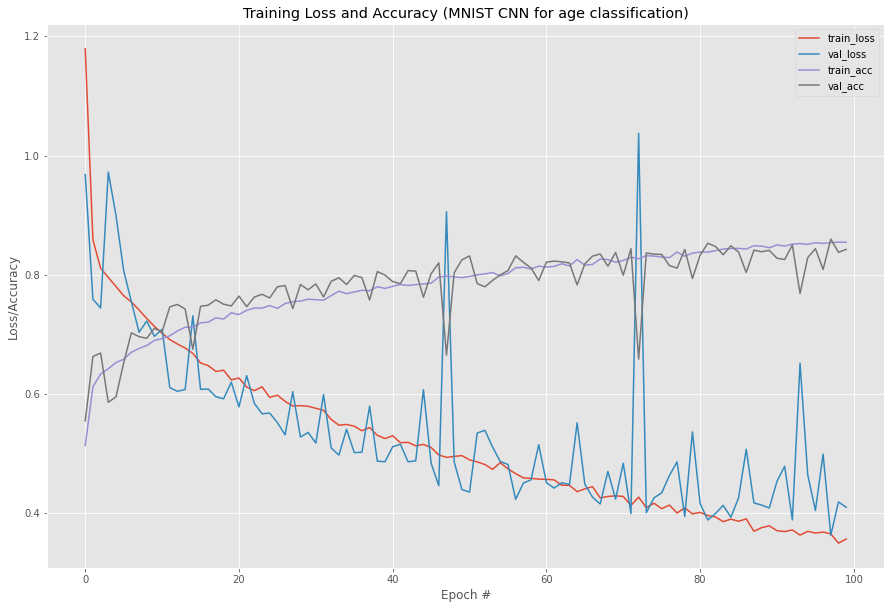

In [36]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (MNIST CNN for age classification)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [37]:
pred = model.predict(images_test)
pred

array([[8.61568213e-01, 8.38369802e-02, 5.45947775e-02],
       [2.25899043e-03, 9.18757432e-05, 9.97649133e-01],
       [5.34036458e-01, 3.00241679e-01, 1.65721893e-01],
       ...,
       [9.60982561e-01, 1.44599406e-02, 2.45574806e-02],
       [9.88657176e-01, 1.08943805e-02, 4.48447914e-04],
       [2.09184848e-02, 2.35107844e-03, 9.76730406e-01]], dtype=float32)

In [38]:
i = pred.argmax(axis=1)
i

array([0, 2, 0, ..., 0, 0, 2])

In [39]:
#Going for second test example 
i1 = pred.argmax(axis=1)[1]
i1

2

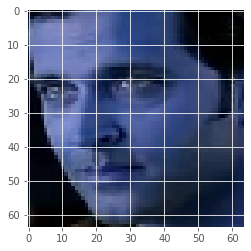

In [40]:
plt.imshow(images_test[1])

In [41]:
vals = np.amax(pred, axis=1)
vals

array([0.8615682 , 0.99764913, 0.53403646, ..., 0.96098256, 0.9886572 ,
       0.9767304 ], dtype=float32)

In [42]:
#going for second test example
val1 = vals[1]
val1

0.99764913

In [43]:
#second test example
perc_val1 = val1*100
perc_val1 = perc_val1.round(2)
perc_val1

99.76

In [0]:
from google.colab.patches import cv2_imshow

In [45]:
label1 = lb.classes_[i1]
label1

'YOUNG'

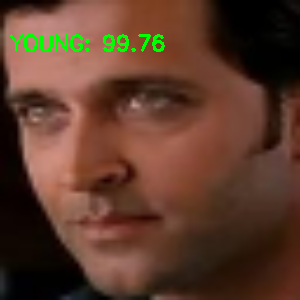

-1

In [46]:
text = label1+": "+str(perc_val1)
#text='.'

outputs[1] = cv2.resize(outputs[1] , (300,300))
cv2.putText(outputs[1], text , (10,50),  cv2.FONT_HERSHEY_SIMPLEX, 0.7 ,(0, 255, 0), 2)

# show the output image

cv2_imshow(outputs[1])
cv2.waitKey(0)

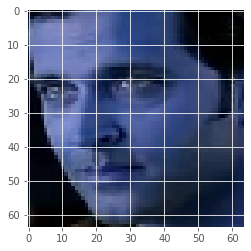

In [47]:
plt.imshow(images_test[1])

In [48]:
output_labels = lb.classes_[i]
output_labels

array(['MIDDLE', 'YOUNG', 'MIDDLE', ..., 'MIDDLE', 'MIDDLE', 'YOUNG'],
      dtype='<U6')

In [49]:
submission = pd.DataFrame({'Class':output_labels,'ID':sample_submn['ID']})
submission

,Class,ID
0,MIDDLE,25321.jpg
1,YOUNG,989.jpg
2,MIDDLE,19277.jpg
3,MIDDLE,13093.jpg
4,MIDDLE,5367.jpg
...,...,...
6631,OLD,1876.jpg
6632,MIDDLE,14940.jpg
6633,MIDDLE,3638.jpg
6634,MIDDLE,376.jpg


In [0]:
#submission.to_csv('submission3_age_classif.csv',index=False)

In [0]:
#from google.colab import files
#files.download("submission3_age_classif.csv")

In [54]:
#Going for fourth test example 
i3 = pred.argmax(axis=1)[3]
i3

0

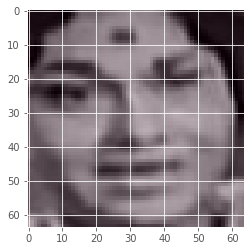

In [55]:
plt.imshow(images_test[3])

In [56]:
val3 = vals[3]
val3

0.99757105

In [57]:
#second test example
perc_val3 = val3*100
perc_val3 = perc_val3.round(2)
perc_val3

99.76

In [58]:
label3 = lb.classes_[i3]
label3

'MIDDLE'

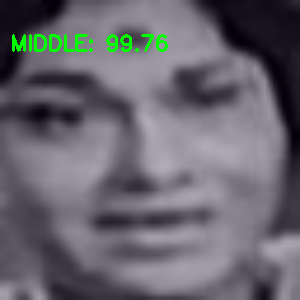

-1

In [59]:
text = label3+": "+str(perc_val3)
#text='.'

outputs[3] = cv2.resize(outputs[3] , (300,300))
cv2.putText(outputs[3], text , (10,50),  cv2.FONT_HERSHEY_SIMPLEX, 0.7 ,(0, 255, 0), 2)

# show the output image

cv2_imshow(outputs[3])
cv2.waitKey(0)

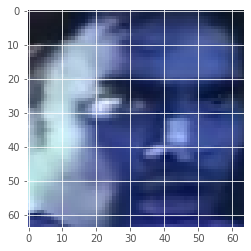

In [60]:
plt.imshow(images[1])

In [61]:
#Going for 6634 test example 
i6631 = pred.argmax(axis=1)[6631]
i6631

1

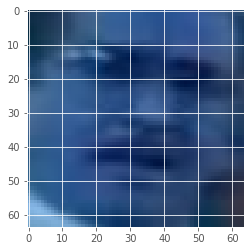

In [62]:
plt.imshow(images_test[6631])

In [63]:
val6631 = vals[6631]
val6631

0.6277511

In [64]:
#second test example
perc_val6631 = val6631*100
perc_val6631 = perc_val6631.round(2)
perc_val6631

62.78

In [65]:
label6631 = lb.classes_[i6631]
label6631

'OLD'

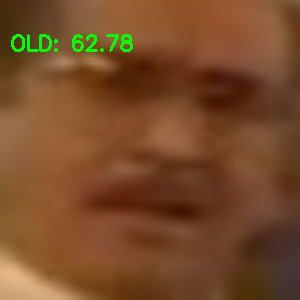

-1

In [66]:
text = label6631+": "+str(perc_val6631)
#text='.'

outputs[6631] = cv2.resize(outputs[6631] , (300,300))
cv2.putText(outputs[6631], text , (10,50),  cv2.FONT_HERSHEY_SIMPLEX, 0.7 ,(0, 255, 0), 2)

# show the output image

cv2_imshow(outputs[6631])
cv2.waitKey(0)